## Exercise-3

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

### Task-1: Analytical Gradients of the Cross-Entropy Loss

**The derivation of analytical gradient of the cross entropy loss**

There are three functions will be used in the derivation:

1. Cross entropy for single sample\
$$
\mathcal{L}^i = -log[\sigma(Wx^i)_{y^i}]
$$

2. Softmax function\
$$
\sigma\mathcal(z)_i = \frac {e^{z_i}}{\sum_j e^{z_j}}
$$
3. Kronecker-delta
$$
\delta_{mn}=
\begin{cases}
1, &m=n\\
0, &m \neq n
\end{cases}
$$

For the analytical gradient of the cross entropy loss:\
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}}
$$

Among them: \
$ p^i = \sigma{(s^i_l)} $ is the probability of $x^i$ after normalizing the score function by softmax\
$ s^i = Wx^i $ is the score function\
$ s^i_l$ is the score of a certain label

For the first item:\
$$
\mathcal{L}^i = -log(p^i_l)   ====>  \frac {\partial\mathcal{L}^i} {\partial p^i_l} = -\frac 1 {p^i_l} 
$$
For the second item,$p^i_l$ is:\
$$
p^i = \sigma(s^i) = \frac {e^{s^i_l}}{\sum e^{s^i}}
$$
Derive this equation: 
$$
\frac {\partial p^i} {\partial s^i_l} = \frac {\frac {\partial e^{s^i}} {\partial s^i_l}*\sum e^{s^i}-e^{s^i_l}*\frac {\partial \sum e^{s^i}} {\partial s^i_l}}{(\sum e^{s^i})^2}=
\begin{cases}
\frac {e^{s^i_l}}{\sum e^{s^i}}*(1-\frac {e^{s^i_l}}{\sum e^{s^i}}) = p^i_l*(1-p^i_l), &\mathcal l\text{ correspond to the real label}\\
\frac {e^{s^i_l}}{\sum e^{s^i}}*\frac {e^{s^i_m}}{\sum e^{s^i}}= p^i_l*(0-p^i_l), &\mathcal l\text{ don't correspond to the real label}
\end{cases}
$$
For the third item, about scores function, it's a linear function of the input, so we can get:\
$$
\frac {\partial s^{lk}} {\partial W_{l,k}} = x^i_k
$$

In summary:
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}} = x^i_k*(p^i_l-\delta_{ly^i}) = x^i_k*(\sigma(Wx^i)_l-\delta_{ly^i})
$$

### Task 2: Data Preparation and Visualization

1. **Import the necessary libraries**

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
from tqdm.auto import tqdm  # Not needed but very cool!
import torch
import torch.nn as nn

The max of train dataset is:
 [[  0   0   0   0   0   0   0   0   0   0   0   0 116 254 216   9   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  16  47 157 254 255 254 255 255 255 255 255 255 255 255
  255 255 244 255 184 197   0   0   0   0]
 [  0   0  64  29 134  62 234 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 165   0   0]
 [  0   0 141 101  96 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 192 121   0]
 [  0  38 144 101 254 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 254 221  63]
 [  0   0  95 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  93]
 [  0   7 210 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 254 253]
 [ 47 191 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 253]
 [191 252 255 255 255 255 255 255 

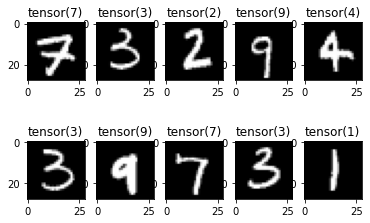

In [2]:
def load_data(train=True):
    mnist = datasets.MNIST('../data',
                           train=train,
                           download=True)
    return mnist


def plot_examples(data):
    #########################
    #### Your Code here  ####
    #########################
    # print(random.randint(0, 5996))
    train_numpy = data.data.numpy()
    # print(np.argmax(train_numpy, axis=0))
    print("The max of train dataset is:\n", train_numpy.max(axis=0))
    print("\nThe min of train dataset is:\n", train_numpy.min(axis=0))
    print("\nThe mean of train dataset is:\n", train_numpy.mean(axis=0))
    print("\nThe shape of train dataset is:\n", data.data.shape)
    print("\nThe dtype of train dataset is:\n", data.data.type())
    # Plot some examples and put their corresponding label on top as title.
    start = random.randint(0, 59989)
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(data.data[start + i].numpy(), cmap="gray")
        plt.title(data.targets[i+start])
    plt.show()
    
    
data = load_data()
# subtask 1
plot_examples(data)

2. **Convert all images into plain vectors and process them to be centered around 0 in the range of [-1, 1]. In the end you should have two arrays of images and labels**

In [3]:
def convert_mnist_to_vectors(data):
    '''Converts the ``[28, 28]`` MNIST images to vectors of size ``[28*28]``.
       It outputs mnist_vectors as a array with the shape of [N, 784], where
       N is the number of images in data.
    '''

    mnist_vectors = []
    labels = []

    #########################
    #### Your Code here  ####
    #########################
    # image--PIL.Image.Image; label--int
    for image, label in tqdm(data):
        mnist_vectors.append(np.asarray(image).ravel())
        labels.append(label)

    # return as numpy arrays
    mnist_vectors = np.asarray(mnist_vectors)
    mnist_vectors_center = (mnist_vectors - mnist_vectors.mean(axis=1)[:, None]) / (
            mnist_vectors.max(axis=1)[:, None] - mnist_vectors.min(axis=1)[:, None])
    labels = np.asarray(labels)

    return mnist_vectors_center, labels

3. **Now run the provided do_pca on the converted data in order to obtain a matrix of sorted eigenvectors that represent the principal components of the train set. Reshape the 10 most important principal components to the shape of [28, 28] in order to plot them as images.**

  0%|          | 0/60000 [00:00<?, ?it/s]

<class 'numpy.ndarray'> (784, 784)


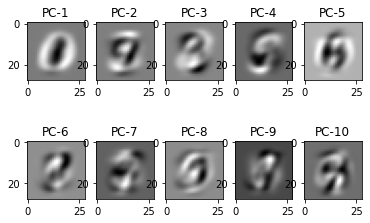

In [4]:
def do_pca(data):
    '''Returns matrix [784x784] whose columns are the sorted eigenvectors.
       Eigenvectors (prinicipal components) are sorted according to their
       eigenvalues in decreasing order.
    '''

    mnist_vectors, labels = convert_mnist_to_vectors(data)
    #     prepare_data(mnist_vectors)

    # compute covariance matrix of data with shape [784x784]
    cov = np.cov(mnist_vectors.T)
    # print("covariance matrix",cov[390])

    # compute eigenvalues and vectors
    eigVals, eigVec = np.linalg.eig(cov)

    # sort eigenVectors by eigenValues
    sorted_index = eigVals.argsort()[::-1]
    eigVals = eigVals[sorted_index]
    # print("The sorted eigVals are:",eigVals)
    sorted_eigenVectors = eigVec[:, sorted_index]
    print(type(sorted_eigenVectors), sorted_eigenVectors.shape)
    sorted_eigenVectors_real = sorted_eigenVectors.real.astype(float).T
    return sorted_eigenVectors.real.astype(float).T


def plot_pcs(sorted_eigenVectors, num=10):
    '''Plots the first ``num`` eigenVectors as images.'''

    #########################
    #### Your Code here  ####
    #########################
    pc_10 = np.empty((10, 28, 28))
    for i in range(num):
        pc_10[i] = sorted_eigenVectors[i].reshape((28, 28))
        plt.subplot(2, 5, i + 1)
        plt.imshow(sorted_eigenVectors[i].reshape((28, 28)), cmap="gray")
        plt.title("PC-"+str(i+1))
    plt.show()    

# # subtask 3
pcs = do_pca(data)
#
# # subtask 3
plot_pcs(pcs)

3. **Explain what you are seeing. Can you make a statement regarding the difficulty of MNIST digit classification problem? What would you expect the principal components to look like, if the problem was easy?**

Finally, the ten most important principal components derived from PCA are shown, and they are significantly different from each other, which means that these principal components present orthogonality in the feature space and are independent of each other.\
The classification problem of MNIST based on PCA is not difficult because in most of the training data, there are significant differences in the distribution of graphs corresponding to different label categories, which allows the principal components obtained from PCA to have a good dimensionality reduction of the data.\
What I expect to see in PCA are principal components that are extremely different from each other. This means that the data itself has good separability, which ensures less data loss during dimensionality reduction. However, it is worth mentioning that PCA principal components cannot intervene using some a priori feature parameter processes, such as some known classifications and labels. To some extent, it is not as explanatory as the original sample features.

4. **Project the MNIST vectors of the train set onto the two most important principal components (associated with two largest eigenvalues). Use the dot product for the projection into the 2D feature space spanned by the two principal components and plot the resulting points in a scatter (use the scatter provided by matplotlib for this) plot. To get a better overview you can also choose a subset of the points. Color each dot corresponding to its class.**

  0%|          | 0/60000 [00:00<?, ?it/s]

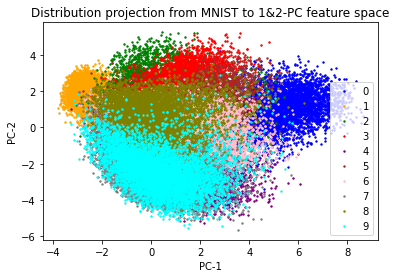

In [5]:
def plot_projection(sorted_eigenVectors, data):
    '''Projects ``data`` onto the first two ``sorted_eigenVectors`` and makes
    a scatterplot of the resulting points'''

    #########################
    #### Your Code here  ####
    #########################
    colorList = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    mnist_vectors, labels = convert_mnist_to_vectors(data)
    pc_1 = mnist_vectors @ sorted_eigenVectors[0]
    pc_2 = mnist_vectors @ sorted_eigenVectors[1]
    for i in range(10):
        indices = np.argwhere(labels == i).ravel()
        # print(indices.shape, pc_1.shape)
        plt.scatter(pc_1[indices], pc_2[indices], color=colorList[i], marker="o", s=2,label=str(i))
        plt.xlabel("PC-1")
        plt.ylabel("PC-2")
        plt.title("Distribution projection from MNIST to 1&2-PC feature space")
    plt.legend()
    plt.show()

        
plot_projection(pcs, data)

4. **Interpret the plot. What can it tell us about the MNIST dataset? Can you make a statement regarding the difficulty of MNIST digit classification problem?**

The plots show the distribution of the MNIST dataset in PC-1&PC-2 feature space. The degree of data points dispersion reflects the interpretability of this feature space. And obviously, the feature space consisting of principal component 1 and principal component 2 is good(or not bad?) in terms of discrete separation for all labels. However,there still exists that some labels are not separated enough, that means, this feature space loses a certain amount of information, in other words,the feature space consisting of PC-1 and PC-2 is not enough to making a separated elaborate to the data. Back to the MNIST classification problem, when applying the PCA method, the difficulty lies in selection of the number of dimensions for feature space, too many feature dimensions will cause an increase in computation and too few feature dimensions will cause a loss of information.

### Task 3: Defining, Training and Evaluating an MLP

1. **Using all skeleton functions provided for this task, build a 5-layer neural network, which accepts MNIST vectors (those from task 2) as input and outputs for each MNIST vector a classification vector containing 10 values, one for each MNIST class. Each hidden layer of the network has 100 hidden units (output feature dimension). All hidden layers should use ReLU activations.**

In [6]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, size_hidden=100, size_out=10):
        super().__init__()

        self.fc1 = nn.Linear(28 * 28, size_hidden)
        self.fc2 = nn.Linear(size_hidden, size_hidden)
        self.fc3 = nn.Linear(size_hidden, size_hidden)
        self.fc4 = nn.Linear(size_hidden, size_hidden)
        self.out_layer = nn.Linear(size_hidden, size_out)

        self.relu = nn.ReLU()

        self.act_features_1 = torch.empty((0, size_hidden),
                                          device='cuda:0' if torch.cuda.is_available() else "cpu")
        self.act_features_2 = torch.empty((0, size_hidden),
                                          device='cuda:0' if torch.cuda.is_available() else "cpu")
        self.act_features_3 = torch.empty((0, size_hidden),
                                          device='cuda:0' if torch.cuda.is_available() else "cpu")
        self.act_features_4 = torch.empty((0, size_hidden),
                                          device='cuda:0' if torch.cuda.is_available() else "cpu")

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        self.act_features_1 = torch.cat([self.act_features_1, out], dim=0)

        # Your Code here: The rest of the layers

        out = self.fc2(out)
        out = self.relu(out)
        self.act_features_2 = torch.cat([self.act_features_2, out], dim=0)

        out = self.fc3(out)
        out = self.relu(out)
        self.act_features_3 = torch.cat([self.act_features_3, out], dim=0)

        out = self.fc4(out)
        out = self.relu(out)
        self.act_features_4 = torch.cat([self.act_features_4, out], dim=0)

        out = self.out_layer(out)

        return out

2. **Implement a function, which can report the accuracy of a batch of predictions in percent.**

In [7]:
def batch_accuracy(prediction, label):
    acc = torch.count_nonzero(prediction == label) / prediction.shape[0]
    return torch.count_nonzero(prediction == label) / prediction.shape[0] * 100


def class_label(prediction):
    # prediction_labels = torch.argmax(prediction, dim=1)
    return torch.argmax(prediction, dim=1)

3. **Train the network for at least 5 epochs and validate the classifier on the test split of the data after each epoch. Do so using the ADAM optimizer from pytorch’s optim package and set the learning rate to 1×10^-4 . Use the Cross Entropy loss provided by pytorch as loss function and then update the network weights using backpropagation.**

In [8]:
class MnistVectors(torch.utils.data.Dataset):
    '''A Pytorch Dataset, which does the same data preparation as was done in
    the PCA exercise.'''

    def __init__(self, split='train'):
        super().__init__()

        mnist = datasets.MNIST('../data',
                               train=split == 'train',
                               download=True)

        ########################
        #### Your Code here ####
        # self.mnist_vectors, self.labels = your conversion function from task 2
        ########################
        self.mnist_vectors, self.labels = convert_mnist_to_vectors(mnist)

    def __getitem__(self, idx):
        '''Implements the ``[idx]`` method. Here we convert the numpy data to
        torch tensors.
        '''

        mvec = torch.tensor(self.mnist_vectors[idx]).float()
        label = torch.tensor(self.labels[idx]).long()

        return mvec, label

    def __len__(self):
        return len(self.labels)

    
def train(use_gpu=True):  # if torch.cuda.is_available(), use gpu to speed up training

    # Here we instantiate our model. The weights of the model are automatically
    # initialized by pytorch
    P = MultilayerPerceptron()
    # print(P.parameters())

    TrainData = MnistVectors()
    TestData = MnistVectors('test')
    # Dataloaders allow us to load the data in batches. This allows us a better
    # estimate of the parameter updates when doing backprop.
    # We need two Dataloaders so that we can train on the train data split
    # and evaluate on the test datasplit.
    Dl = DataLoader(TrainData, batch_size=16, shuffle=True)
    testDl = DataLoader(TestData, batch_size=16, shuffle=False)

    # Use the Adam optimizer with learning rate 1e-4 and otherwise default value
    # Use the torch.optim.Adam to define a optimizer, use the parameters() method of MLP to pass in iterable parameters and define the leaning rate with 1e-4
    optimizer = torch.optim.Adam(P.parameters(), lr=1e-4)

    # Use the Cross Entropy loss from pytorch. Make sure your MultilayerPerceptron does not use any activation function on the output layer! (Do you know why?)
    criterion = nn.CrossEntropyLoss()  # define a loss function with Cross Entropy loss
    print(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    if use_gpu:
        P.cuda()
        criterion.cuda()

    for epoch in tqdm(range(5), desc='Epoch'):
        for step, [example, label] in enumerate(tqdm(Dl, desc='Batch')):
            if use_gpu:
                example = example.cuda()
                label = label.cuda()

            # The optimizer knows about all model parameters. These in turn
            # store their own gradients. When calling loss.backward() the newly
            # computed gradients are added on top of the existing ones. Thus
            # at before calculating new gradients we need to clear the old ones
            # using ther zero_grad() method.
            optimizer.zero_grad()

            prediction = P(example)

            loss = criterion(prediction, label)

            # Here pytorch applies backpropagation for us completely automatically!!! That is quite awesome!
            loss.backward()

            # The step method now adds the gradients onto the model parameters as specified by the optimizer and the learning rate.
            optimizer.step()

            # To keep track of what is happening print some outputs from time to time.
            if (step % 375) == 0:
                # Your code here
                print("In step-", step)
                acc = batch_accuracy(class_label(prediction), label)
                tqdm.write('Batch Accuracy: {}%, Loss: {}'.format(acc, loss))

        # Now validate on the whole test set
        accuracies = []
        for idx, [test_ex, test_l] in enumerate(tqdm(testDl, desc='Test')):
            if use_gpu:
                test_ex = test_ex.cuda()
                test_l = test_l.cuda()

            #########################
            #### Your Code here  ####
            #########################
            accuracies.append(batch_accuracy(class_label(P(test_ex)), test_l).cpu().numpy())

            # Using your batch_accuracy function, also print the mean accuracy
            # over the whole test split of the data.

        print('Validation Accuracy: {}%'.format(np.mean(accuracies)))

        # Now let's write out a checkpoint of the model, so that we can
        # reuse it:
        torch.save(P.state_dict(), 'perceptron_{}.ckpt'.format(step))
        
        
train()

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

cuda


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

In step- 0
Batch Accuracy: 18.75%, Loss: 2.2740750312805176
In step- 375
Batch Accuracy: 56.25%, Loss: 1.230859637260437
In step- 750
Batch Accuracy: 81.25%, Loss: 0.40180468559265137
In step- 1125
Batch Accuracy: 93.75%, Loss: 0.2733977735042572
In step- 1500
Batch Accuracy: 93.75%, Loss: 0.35396820306777954
In step- 1875
Batch Accuracy: 93.75%, Loss: 0.5238917469978333
In step- 2250
Batch Accuracy: 100.0%, Loss: 0.09957457333803177
In step- 2625
Batch Accuracy: 87.5%, Loss: 0.44778573513031006
In step- 3000
Batch Accuracy: 87.5%, Loss: 0.31480464339256287
In step- 3375
Batch Accuracy: 87.5%, Loss: 0.2989858090877533


Test:   0%|          | 0/625 [00:00<?, ?it/s]

Validation Accuracy: 90.48999786376953%


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

In step- 0
Batch Accuracy: 87.5%, Loss: 0.32870131731033325
In step- 375
Batch Accuracy: 87.5%, Loss: 0.3829447329044342
In step- 750
Batch Accuracy: 93.75%, Loss: 0.5188865065574646
In step- 1125
Batch Accuracy: 87.5%, Loss: 0.3290711045265198
In step- 1500
Batch Accuracy: 87.5%, Loss: 0.19126877188682556
In step- 1875
Batch Accuracy: 100.0%, Loss: 0.06595851480960846
In step- 2250
Batch Accuracy: 93.75%, Loss: 0.14391206204891205
In step- 2625
Batch Accuracy: 93.75%, Loss: 0.17080867290496826
In step- 3000
Batch Accuracy: 93.75%, Loss: 0.13583959639072418
In step- 3375
Batch Accuracy: 81.25%, Loss: 0.613235592842102


Test:   0%|          | 0/625 [00:00<?, ?it/s]

Validation Accuracy: 92.44999694824219%


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

In step- 0
Batch Accuracy: 87.5%, Loss: 0.2808316648006439
In step- 375
Batch Accuracy: 100.0%, Loss: 0.022920357063412666
In step- 750
Batch Accuracy: 87.5%, Loss: 0.18602927029132843
In step- 1125
Batch Accuracy: 100.0%, Loss: 0.026920508593320847
In step- 1500
Batch Accuracy: 93.75%, Loss: 0.23188622295856476
In step- 1875
Batch Accuracy: 93.75%, Loss: 0.1674281805753708
In step- 2250
Batch Accuracy: 87.5%, Loss: 0.9999015927314758
In step- 2625
Batch Accuracy: 100.0%, Loss: 0.08986210823059082
In step- 3000
Batch Accuracy: 100.0%, Loss: 0.022620629519224167
In step- 3375
Batch Accuracy: 93.75%, Loss: 0.47102221846580505


Test:   0%|          | 0/625 [00:00<?, ?it/s]

Validation Accuracy: 94.55000305175781%


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

In step- 0
Batch Accuracy: 87.5%, Loss: 0.26204514503479004
In step- 375
Batch Accuracy: 100.0%, Loss: 0.005974342115223408
In step- 750
Batch Accuracy: 87.5%, Loss: 0.3324088752269745
In step- 1125
Batch Accuracy: 93.75%, Loss: 0.11827681958675385
In step- 1500
Batch Accuracy: 93.75%, Loss: 0.1399628072977066
In step- 1875
Batch Accuracy: 93.75%, Loss: 0.2352154701948166
In step- 2250
Batch Accuracy: 93.75%, Loss: 0.14172549545764923
In step- 2625
Batch Accuracy: 93.75%, Loss: 0.0741119235754013
In step- 3000
Batch Accuracy: 100.0%, Loss: 0.058077894151210785
In step- 3375
Batch Accuracy: 100.0%, Loss: 0.10624250769615173


Test:   0%|          | 0/625 [00:00<?, ?it/s]

Validation Accuracy: 95.0199966430664%


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

In step- 0
Batch Accuracy: 93.75%, Loss: 0.14343558251857758
In step- 375
Batch Accuracy: 93.75%, Loss: 0.1629975438117981
In step- 750
Batch Accuracy: 100.0%, Loss: 0.05846599489450455
In step- 1125
Batch Accuracy: 100.0%, Loss: 0.06094261631369591
In step- 1500
Batch Accuracy: 100.0%, Loss: 0.046021249145269394
In step- 1875
Batch Accuracy: 100.0%, Loss: 0.10287393629550934
In step- 2250
Batch Accuracy: 100.0%, Loss: 0.022610751911997795
In step- 2625
Batch Accuracy: 100.0%, Loss: 0.12342171370983124
In step- 3000
Batch Accuracy: 100.0%, Loss: 0.046028293669223785
In step- 3375
Batch Accuracy: 93.75%, Loss: 0.28856775164604187


Test:   0%|          | 0/625 [00:00<?, ?it/s]

Validation Accuracy: 95.9000015258789%


4. **How well does your model perform on the test data after training?**

The model got a nice result even just after the first epoch, the validation accuracy reach about 90%. And it reachs highest at 5th epoch. It os worth noting that the accuracies of 4th and 5th have not big difference. It is conjectured that for this model, a good fit has been achieved at this point.

### Task 4: Visualizing MLP Features

1. **For all MNIST images of the test split, or if you have limited computational resource for a subset of at least 1000 images, store the activation features from after each ReLU call. You should have 4 arrays of shape [10000, 100].**
2. **For each of the arrays repeat the steps from task 2 to find the principal components of the resulting vectors and project the features onto the two most important principal components.**
3. **Make a scatter plot of the resulting projected points for the features from the first, second, third and fourth layer.**

  0%|          | 0/10000 [00:00<?, ?it/s]

Test:   0%|          | 0/10000 [00:00<?, ?it/s]

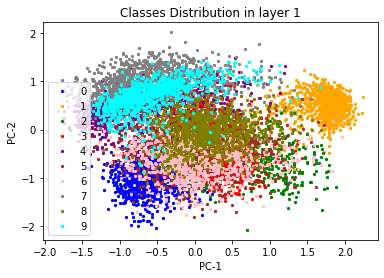

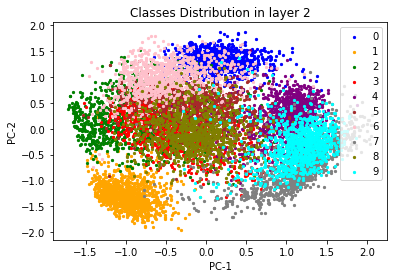

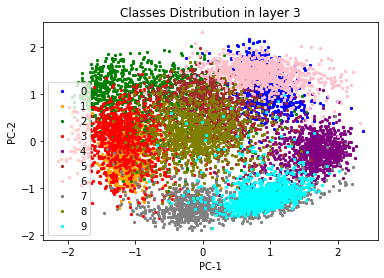

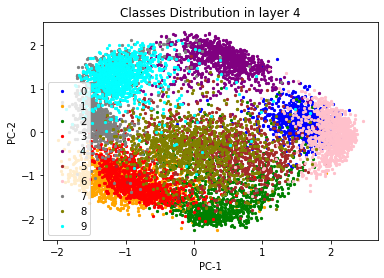

In [9]:
def task_4():
    P = MultilayerPerceptron()
    P.cuda()
    P.load_state_dict(torch.load("perceptron_3749.ckpt"))
    TestData = MnistVectors('test')
    testDl = DataLoader(TestData, batch_size=1, shuffle=False)
    labels_test = testDl.dataset.labels
    for idx, [test_ex, test_l] in enumerate(tqdm(testDl, desc='Test')):
        test_ex = test_ex.cuda()
        P(test_ex)

    def mpl_pca_projection(features, layer, labels):
        features_center = (features - features.mean(axis=1)[:, None]) / (
                features.max(axis=1)[:, None] - features.min(axis=1)[:, None])
        # features_center = features
        cov = np.cov(features_center.T)
        # print("covariance matrix",cov[390])

        # compute eigenvalues and vectors
        eigVals, eigVec = np.linalg.eig(cov)

        # sort eigenVectors by eigenValues
        sorted_index = eigVals.argsort()[::-1]
        eigVals = eigVals[sorted_index]
        sorted_eigenVectors = eigVec[:, sorted_index]
        sorted_eigenVectors_real = sorted_eigenVectors.real.astype(float).T
        pc_1 = features_center @ sorted_eigenVectors_real[0]
        pc_2 = features_center @ sorted_eigenVectors_real[1]
        colorList = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
        plt.title("Classes Distribution in layer " + str(layer))
        plt.xlabel("PC-1")
        plt.ylabel("PC-2")

        for i in range(10):
            # plt.scatter(pc_1, pc_2)
            indices = np.argwhere(labels == i).ravel()
            plt.scatter(pc_1[indices], pc_2[indices], color=colorList[i], marker="o", s=5, label=str(i))
        plt.legend()
        plt.show()
        pass

    act_features_1 = P.act_features_1.detach().cpu().numpy()
    act_features_2 = P.act_features_2.detach().cpu().numpy()
    act_features_3 = P.act_features_3.detach().cpu().numpy()
    act_features_4 = P.act_features_4.detach().cpu().numpy()
    mpl_pca_projection(act_features_1, 1, labels_test)
    mpl_pca_projection(act_features_2, 2, labels_test)
    mpl_pca_projection(act_features_3, 3, labels_test)
    mpl_pca_projection(act_features_4, 4, labels_test)
    

task_4()


3. **What can you observe? How well are the individual digit classes separated in the scatter plot?**

From the first layer to the fourth layer, there are different degrees of separation of data in the feature space of each layer. The highest is reached in the fourth layer feature space. It indicates that PC-1 and PC-2 extracted in the fourth layer have the best effect on the dimensionality reduction of the data.

4. **Compare the plots to the scatter plot from task 2. What has changed, what is similar? Can you make a statement regarding the difficulty of MNIST digit classification problem? Do you believe that the MLP is a suitable method for MNIST digit classification? Provide an explanation.**

The data have good separation in both feature spaces, but the distribution profiles are different. It can basically meet the requirement of sample separation in MNIST classification problem.\
I think MLP is well suited for the MNIST classification problem because the label information in its training set is involved in the training of the model as parameters, giving the model a calibration based on the ground truth. If new data ( ground truth) is available, it is only need to keep training to adjust the weight matrix to make the model more generalizable.